In [92]:
%pylab inline
from IPython.display import Audio

Populating the interactive namespace from numpy and matplotlib


# General audio work

We'll use the `scipy.io` module to read and write .wav files. This is handy because it represents sample data as NumPy arrays. In environments where scipy is not available, you can use the `wave` module which is part of python's standard library. Read the docs [here](http://docs.python.org/2/library/wave.html). However, the `wave` module is trickier to use because it gives you the sample data in terms of raw bytes, so you must manually turn them into NumPy arrays.

Here's an example of how to use `scipy.io.wavfile`'s `read` and `write` functions:

```python
wavfile.write('output.wav', 44100, array(sampleData, dtype=int16))
```

```python
sampleRate, sampleData = wavfile.read('input.wav')
```

In [93]:
from scipy.io import wavfile

[ 0.          0.6981317   1.3962634   2.0943951   2.7925268   3.4906585
  4.1887902   4.88692191  5.58505361  6.28318531]


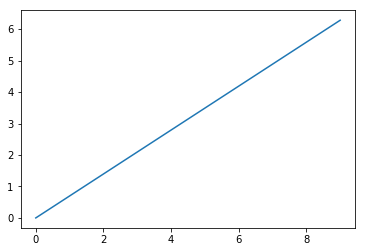

In [94]:
# start, stop, steps
plot(linspace(0, 2 * pi, 10))
print(linspace(0, 2 * pi, 10))

In [95]:
duration = 2 # seconds
sampleRate = 44100 # Hz === 1/seconds

# generate a bunch of .wav files with sin waves at various frequencies
for frequency in [440, 660, 880, 1000, 2000]:
    phase = linspace(0, 2 * pi * frequency * duration, sampleRate * duration)
    sample = sin(phase) * (2.0**15)
    wavfile.write('result/tone-%i.wav' % frequency, sampleRate, sample.astype(int16))

In [96]:
ls result

faded_tone-1000.wav         tone-1000.wav
faded_tone-2000.wav         tone-2000.wav
faded_tone-440.wav          tone-440.wav
faded_tone-660.wav          tone-660.wav
faded_tone-880.wav          tone-880.wav
faded_tone-interleaved.wav  tone-interleaved.wav
output.mid                  tone_stereo.wav
output_random.mid


<class 'int'>
<class 'numpy.ndarray'>


(88200,)

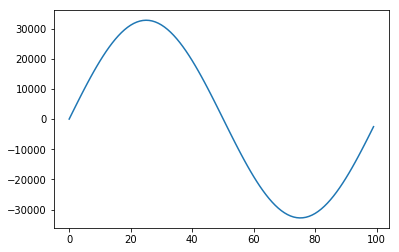

In [97]:
sampleRate, sample = wavfile.read('result/tone-440.wav')
print(type(sampleRate))
print(type(sample))
plot(sample[0:100]) # means "plot only the first 100 values
# number of samples / sample rate == duration
sample.shape

In [98]:
Audio('result/tone-440.wav')

## Working with more than one channel

Interleaving/De-interleaving

In [99]:
duration = 2 # seconds
sampleRate = 44100 # Hz

phaseLeftChannel = linspace(0, 2 * pi * 440 * duration, sampleRate * duration)
sampleChannelLeft = sin(phaseLeftChannel) * (2.0**15)

phaseRightChannel = linspace(0, 2 * pi * 660 * duration, sampleRate * duration)
sampleChannelRight = sin(phaseRightChannel) * (2.0**15)

wavfile.write('result/tone_stereo.wav', sampleRate, array((sampleChannelLeft, sampleChannelRight)).T.astype(int16))

What the hell is `T`?? (google "numpy array T" and find [this](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.ndarray.T.html)) this is because of the API of wavfile - which dim is the channel versus the samples

In [100]:
Audio('result/tone_stereo.wav')

In [101]:
sampleRate, sample = wavfile.read('result/tone_stereo.wav')
sample.shape

(88200, 2)

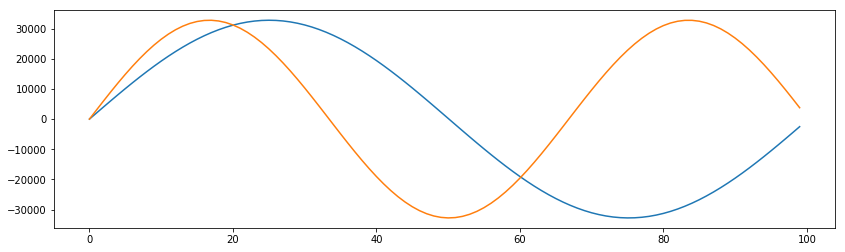

In [102]:
plot(sample[:100,0]) # left (440)
plot(sample[:100,1]) # right (660)
gcf().set_figwidth(14)

In [103]:
interleaved = array(sample.flat)
interleaved
interleaved.shape

(176400,)

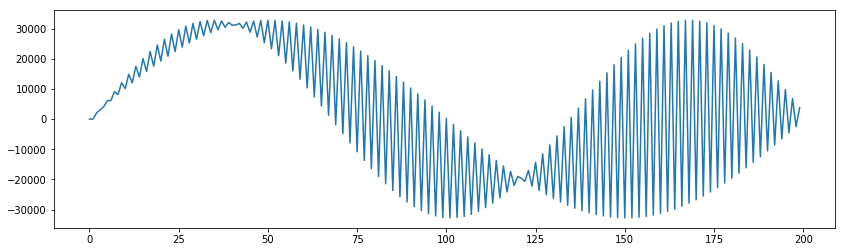

In [104]:
plot(interleaved[:200])
gcf().set_figwidth(14)

In [105]:
wavfile.write('result/tone-interleaved.wav', sampleRate, interleaved.astype(int16))
Audio('result/tone-interleaved.wav')

In [106]:
print(sample[:5,0], 'left')
print(sample[:5,1], 'right')
print(interleaved[:10], 'interleaved')

[   0 2052 4097 6126 8131] left
[    0  3076  6126  9121 12036] right
[    0     0  2052  3076  4097  6126  6126  9121  8131 12036] interleaved


In [107]:
sliceStep = 2
print(interleaved[0:10:sliceStep])
print(interleaved[1:10:sliceStep])

[   0 2052 4097 6126 8131]
[    0  3076  6126  9121 12036]


## Scripting

What if we want to perform actions on a large number of files? For example, how would we modify all files in a directory such that the fade out rather than just suddenly come to an end?

Let's use [globs](https://en.wikipedia.org/wiki/Glob_(programming)...

In [108]:
import glob

In [109]:
glob.glob('result/*.wav')

['result/faded_tone-1000.wav',
 'result/faded_tone-2000.wav',
 'result/faded_tone-440.wav',
 'result/faded_tone-660.wav',
 'result/faded_tone-880.wav',
 'result/faded_tone-interleaved.wav',
 'result/tone-1000.wav',
 'result/tone-2000.wav',
 'result/tone-440.wav',
 'result/tone-660.wav',
 'result/tone-880.wav',
 'result/tone-interleaved.wav',
 'result/tone_stereo.wav']

In [110]:
# we can filter matches according to a pattern
glob.glob('result/tone-*.wav')

['result/tone-1000.wav',
 'result/tone-2000.wav',
 'result/tone-440.wav',
 'result/tone-660.wav',
 'result/tone-880.wav',
 'result/tone-interleaved.wav']

In [112]:
# what does *= mean?
foo = 10
foo *= 2
print(foo)
# foo *= 2 is equivalent to foo = foo * 2

20


In [114]:
# what does int(x) mean?
value = int(23.87)
print(value)
# int(x) makes x into and integer by throwing away any/all decimals

23


In [115]:
sampleRate = 44100
int(-sampleRate / 2)

-22050

In [116]:
fileList = glob.glob('result/tone-*.wav')

for file in fileList:
    sampleRate, sample = wavfile.read(file)
    sample = sample.astype(float)
    fade = linspace(1.0, 0.0, int(sampleRate / 2.0))
    sample[int(-sampleRate / 2):] *= fade
    wavfile.write(file.replace('tone', 'faded_tone'), sampleRate, sample.astype(int16))

In [117]:
ls result

faded_tone-1000.wav         tone-1000.wav
faded_tone-2000.wav         tone-2000.wav
faded_tone-440.wav          tone-440.wav
faded_tone-660.wav          tone-660.wav
faded_tone-880.wav          tone-880.wav
faded_tone-interleaved.wav  tone-interleaved.wav
output.mid                  tone_stereo.wav
output_random.mid


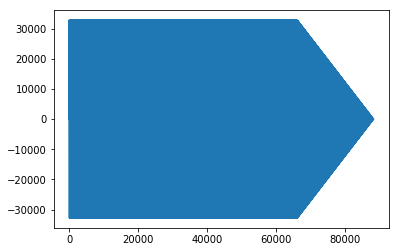

In [118]:
sampleRate, sample = wavfile.read('result/faded_tone-440.wav')
plot(sample)

In [119]:
Audio('result/faded_tone-440.wav')

Above, to acheive the fade-out effect, we multiplied two numpy arrays, one containing tone data and the other containing line data. This multiply was executed element by element, so we call it *elementwise muliplication*. If the second array were a complex waveform rather than a line, then we might get a modulation or tremelo effect.

## Other audio formats, libraries, and metadata
- [Python Audio Tools](http://audiotools.sourceforge.net) - CD audio extraction, audio format conversion, metadata editing
- [mutegen](https://mutagen.readthedocs.io/en/latest) - handling audio metadata, MP3, Ogg, ID3 and APEv2

In [120]:
Audio('media/GermanAmplitudeModulation.mp3')

Why didn't this work for you? Try `pip3 install mutagen` on the terminal, then try the cell again.

In [121]:
from mutagen.easyid3 import EasyID3
audio = EasyID3("media/GermanAmplitudeModulation.mp3")
#audio["title"] = 'Example of Amplitude Modulation - German Voice'
#audio.save()
print(audio["title"])

['Example of Amplitude Modulation - German Voice']


# Score/MIDI/Code generation

You can generate code or MIDI using python to drive other music production systems.

Generating text scores for languages like Csound is simple in Python thanks to it's string processing capabilities.

In [122]:
# programmatically generate a Csound score

score = ''
time = 0
dur = 0.5

import random

for i in range(10):
    freq = 440 + random.random() * 440 
    score += "i 1 %f %f %f\n" % (time, dur, freq)
    time += dur

In [123]:
print(score)

i 1 0.000000 0.500000 543.442512
i 1 0.500000 0.500000 814.343830
i 1 1.000000 0.500000 699.821435
i 1 1.500000 0.500000 608.199858
i 1 2.000000 0.500000 840.529998
i 1 2.500000 0.500000 648.333900
i 1 3.000000 0.500000 471.054370
i 1 3.500000 0.500000 592.052154
i 1 4.000000 0.500000 742.328758
i 1 4.500000 0.500000 494.469648



In Csound, your music program is split into two pieces 1) the instrument definitions, and 2) the score. The score part is an event list where each line represents an independent input to some previously defined instrument. Generally, but not always, each line of the score starts with "i N t d" where $i$ is literally "i", $N$ is an integer that identifies a specific instrument, $t$ is a time (in seconds) that represents when a note should start, $d$ is a duration (in seconds) that represents how long a note should play.

Read more about Csound [here](http://csound.github.io/get-started.html#csound-syntax). Try out Csound online [here](http://eddyc.github.io/CsoundEmscripten).

$foo$

$$x = cos(t)$$

## Using MIDI devices.. 
- [midiutil](https://code.google.com/p/midiutil) - A simple library for working with MIDI files

In [124]:
from midiutil.MidiFile import MIDIFile

# Create the MIDIFile Object with 1 track
MyMIDI = MIDIFile(1)

# Tracks are numbered from zero. Times are measured in beats.
track = 0   
time = 0

# Add track name and tempo.
MyMIDI.addTrackName(track,time,"Sample Track")
MyMIDI.addTempo(track,time,120)

# Add a note. addNote expects the following information:
track = 0
channel = 0
pitch = 62
time = 0
duration = 1
volume = 100

# Now add the note.
MyMIDI.addNote(track,channel,pitch,time,duration,volume)

# And write it to disk.
binfile = open("result/output.mid", 'wb')
MyMIDI.writeFile(binfile)
binfile.close()

/usr/local/lib/python3.6/site-packages/midiutil/MidiFile.py:899: FutureWarning: Please explicitly set adjust_origin. Default behaviour will change in a future version.
  FutureWarning)


What should we do about this error? (Hint: we fixed something like this before.)

In [126]:
# sorry this will not work on Windows
!/usr/local/bin/fluidsynth -i media/gugs1.471.sf2 result/output.mid

FluidSynth version 1.1.6
Copyright (C) 2000-2012 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


Now generate a sequence of notes:

In [127]:
from midiutil.MidiFile import MIDIFile
# Create the MIDIFile Object with 1 track
MyMIDI = MIDIFile(1)

track = 0   
time = 0

MyMIDI.addTrackName(track,time,"Sample Track")
MyMIDI.addTempo(track,time,120)

# Add a note. addNote expects the following information:
track = 0
channel = 0
pitch = 62
time = 0
duration = 1
volume = 100

for i in range(10):
    pitch = 48 + int(random.random() * 24)
    time += duration
    MyMIDI.addNote(track,channel,pitch,time,duration,volume)

# And write it to disk.
binfile = open("result/output_random.mid", 'wb')
MyMIDI.writeFile(binfile)
binfile.close()


/usr/local/lib/python3.6/site-packages/midiutil/MidiFile.py:899: FutureWarning: Please explicitly set adjust_origin. Default behaviour will change in a future version.
  FutureWarning)


In [128]:
# again, sorry Windows users
!/usr/local/bin/fluidsynth -i media/gugs1.471.sf2 result/output_random.mid

FluidSynth version 1.1.6
Copyright (C) 2000-2012 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


# Digital Signal Processing and Acoustics

Python can be useful as a prototyping tool for DSP and acoustics algorithms.

In [129]:
sampleRate, signal = wavfile.read('media/wobble.wav')

/usr/local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


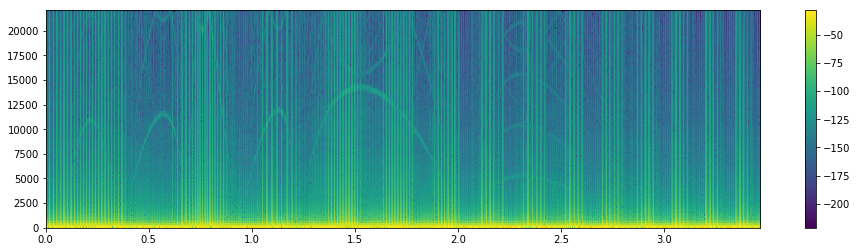

In [130]:
spectrum, frequency, time, image = specgram(signal, Fs = sampleRate)
colorbar()
gcf().set_figwidth(16)

In [131]:
1766 * (1.06 / 5.12)

365.6171875

In [132]:
print(time.shape)
time

(1194,)


array([  2.90249433e-03,   5.80498866e-03,   8.70748299e-03, ...,
         3.45977324e+00,   3.46267574e+00,   3.46557823e+00])

In [133]:
print(frequency.shape)
frequency

(129,)


array([     0.      ,    172.265625,    344.53125 ,    516.796875,
          689.0625  ,    861.328125,   1033.59375 ,   1205.859375,
         1378.125   ,   1550.390625,   1722.65625 ,   1894.921875,
         2067.1875  ,   2239.453125,   2411.71875 ,   2583.984375,
         2756.25    ,   2928.515625,   3100.78125 ,   3273.046875,
         3445.3125  ,   3617.578125,   3789.84375 ,   3962.109375,
         4134.375   ,   4306.640625,   4478.90625 ,   4651.171875,
         4823.4375  ,   4995.703125,   5167.96875 ,   5340.234375,
         5512.5     ,   5684.765625,   5857.03125 ,   6029.296875,
         6201.5625  ,   6373.828125,   6546.09375 ,   6718.359375,
         6890.625   ,   7062.890625,   7235.15625 ,   7407.421875,
         7579.6875  ,   7751.953125,   7924.21875 ,   8096.484375,
         8268.75    ,   8441.015625,   8613.28125 ,   8785.546875,
         8957.8125  ,   9130.078125,   9302.34375 ,   9474.609375,
         9646.875   ,   9819.140625,   9991.40625 ,  10163.671

In [134]:
print(spectrum.shape)
spectrum

(129, 1194)


array([[  5.47560917e-05,   1.64995185e-04,   2.26101601e-04, ...,
          2.36328501e-05,   3.09830972e-04,   5.91572589e-04],
       [  3.32773557e-04,   2.23734149e-04,   1.82762948e-04, ...,
          8.90677766e-05,   2.10292925e-04,   3.40536447e-04],
       [  1.47912959e-04,   1.25407010e-05,   2.63370082e-06, ...,
          4.75069991e-06,   1.88623685e-06,   1.02658735e-06],
       ..., 
       [  7.46246292e-12,   1.00475978e-15,   1.03172366e-16, ...,
          4.28079598e-15,   4.37147928e-16,   1.16352809e-19],
       [  7.62969436e-12,   5.82743176e-15,   2.46981924e-16, ...,
          2.78517333e-15,   4.57437287e-16,   9.71145621e-20],
       [  3.81114579e-12,   3.69228336e-15,   2.75919532e-16, ...,
          2.86227370e-16,   2.11743295e-16,   1.00214520e-19]])

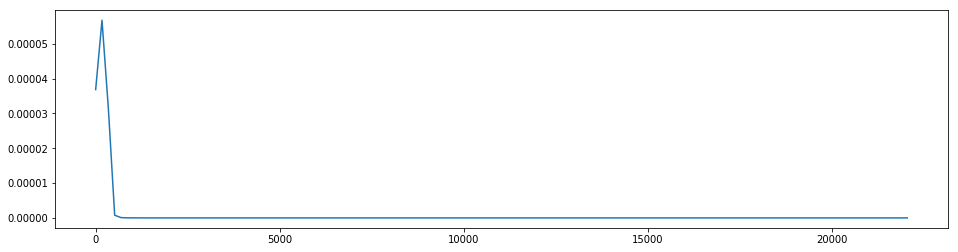

In [135]:
plot(frequency, spectrum[:,370])
gcf().set_figwidth(16)

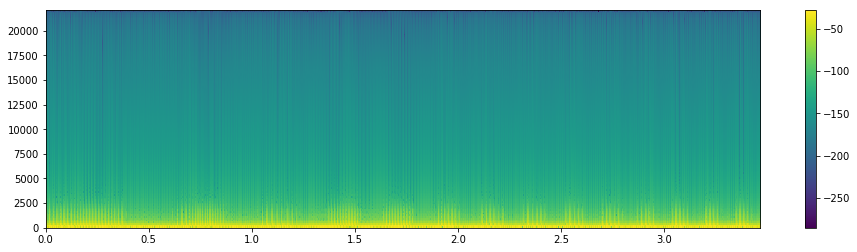

In [136]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtered = butter_lowpass_filter(signal, 1500, sampleRate)

spectrum2, frequency2, time2, image2 = specgram(filtered, Fs=sampleRate);
colorbar()
gcf().set_figwidth(16)


# r_ is a hack to concat along the 1st dim (rows) .. (overloads the index op)
# c_ is by column
# he built a 1st order low pass by adding to a time-shifted version of the signal..
# make this play a sound so we can hear the result
# pick more harmonic material for this..
#

In [139]:
Audio(data=signal, rate=44100)

In [140]:
Audio(data=filtered, rate=44100)

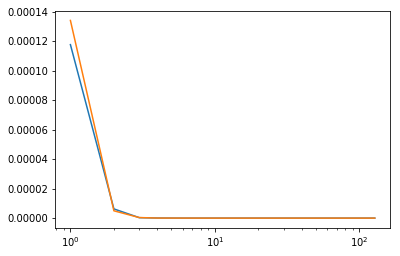

In [141]:
semilogx(spectrum[:,10])
semilogx(spectrum2[:,10])

http://docs.scipy.org/doc/scipy/reference/signal.html

# Synthesis

Python can be useful for prototyping synthesis techniques offline (to file), and there are synthesis libraries for Python like pyo:

* https://code.google.com/p/pyo/

In [142]:
from pyo import *
s = Server().boot()

pyo version 0.8.4 (uses single precision)

WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/

Portmidi warning: no midi device found!
Portmidi closed.


In [143]:
a = Sine(440, 0, 0.1).out()
s.start()

In [144]:
b = Sine(880, 0, 0.1).out()

In [145]:
s.stop()

In [146]:
s.shutdown()
s.boot()
b = Sine(880, 0, 0.1).out()
s.start()

Portmidi warning: no midi device found!
Portmidi closed.


In [147]:
s.stop()

For some reason, the stop() function needs to settle before the shutdown(), so put them in separate cells...

In [148]:
s.shutdown()
s.boot()

Portmidi warning: no midi device found!
Portmidi closed.


In [149]:
s.shutdown()
s.boot()
s.start()
wav = SquareTable()
env = CosTable([(0,0), (100,1), (500,.3), (8191,0)])
met = Metro(.250, 12).play()
amp = TrigEnv(met, table=env, mul=.1)
pit = TrigXnoiseMidi(met, dist='loopseg', x1=20, scale=1, mrange=(48,84))
out = Osc(table=wav, freq=pit, mul=amp).out()

Portmidi warning: no midi device found!
Portmidi closed.


In [150]:
s.stop()

In [151]:
# this opens a GUI!!
s.start()
wav = SquareTable()
env = CosTable([(0,0), (100,1), (500,.3), (8191,0)])
met = Metro(.250, 12).play()
amp = TrigEnv(met, table=env, mul=.1)
pit = TrigXnoiseMidi(met, dist='loopseg', x1=20, scale=1, mrange=(48,84))
out = Osc(table=wav, freq=pit, mul=amp).out()
s.gui(locals())

# By Andrés Cabrera mantaraya36@gmail.com

For course MAT 240A at UCSB

(improved and extended by Karl Yerkes)

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)